In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
tr=pd.read_csv('train.csv')
ts=pd.read_csv('test.csv')

In [3]:
tr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
ts

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
tr.shape

(1460, 81)

In [6]:
ts.shape

(1459, 80)

In [7]:
tr.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
tr.columns[tr.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [9]:
nulldf=tr[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature']]

In [10]:
nulldf.isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [11]:
tr.drop(columns=["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","Id"],inplace=True)
ts.drop(columns=["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","Id"],inplace=True)

In [12]:
tr

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [13]:
tr.columns[tr.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [14]:
nulldf=tr[['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond']]

In [15]:
nulldf.isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

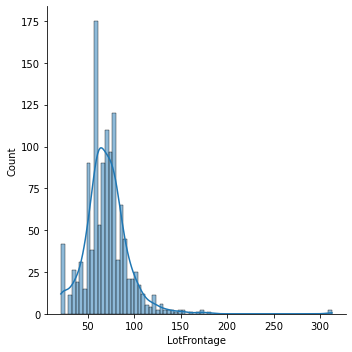

In [16]:
sns.displot(tr['LotFrontage'],kde=True)

In [17]:
tr.describe()['LotFrontage']

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotFrontage'>

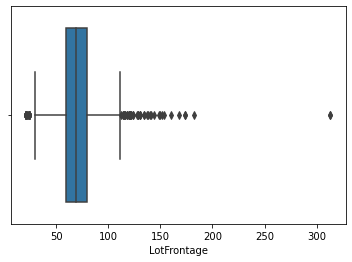

In [18]:
sns.boxplot(tr['LotFrontage'])

In [19]:
import random

In [20]:
def imputeWithinIQR(value,lowQuartile,upperQuartile):
    if(pd.isnull(value)):
        x=random.randrange(lowQuartile,upperQuartile,1)
        return x
    else:
        return value

In [21]:
imputeWithinIQR(np.nan,59,81)

66

In [22]:
tr['LotFrontage']=tr['LotFrontage'].apply(lambda x:imputeWithinIQR(x,59,81))

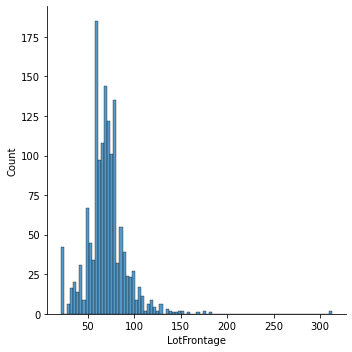

In [23]:
sns.displot(tr['LotFrontage'])

In [24]:
tr.columns[tr.isnull().any()]

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [25]:
nulldf=tr[['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']]
nulldf.isnull().sum()

MasVnrType       8
MasVnrArea       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MasVnrType', ylabel='count'>

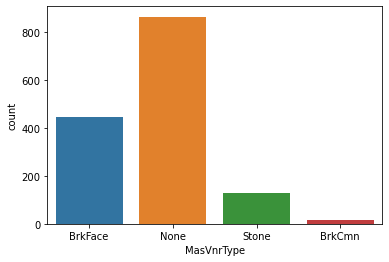

In [26]:
sns.countplot(tr["MasVnrType"])

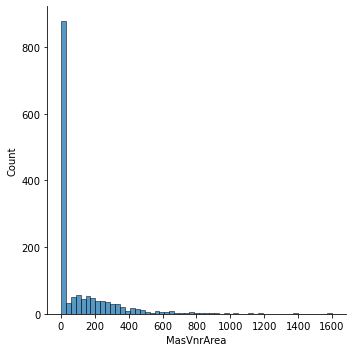

In [27]:
sns.displot(tr['MasVnrArea'])

In [28]:
tr["MasVnrArea"].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
tr["MasVnrArea"]=tr["MasVnrArea"].apply(lambda x: imputeWithinIQR(x,0,166))
ts["MasVnrArea"]=ts["MasVnrArea"].apply(lambda x: imputeWithinIQR(x,0,166))

In [30]:
tr.columns[tr.isnull().any()]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [31]:
nulldf=tr[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond']]

In [32]:
nulldf.isnull().sum()

MasVnrType       8
BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
Electrical       1
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BsmtQual', ylabel='count'>

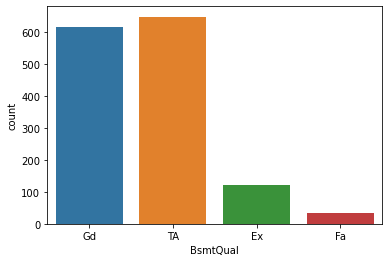

In [33]:
sns.countplot(tr["BsmtQual"])

In [34]:
tr[pd.isnull(tr["BsmtCond"])]["BsmtQual"]

17      NaN
39      NaN
90      NaN
102     NaN
156     NaN
182     NaN
259     NaN
342     NaN
362     NaN
371     NaN
392     NaN
520     NaN
532     NaN
533     NaN
553     NaN
646     NaN
705     NaN
736     NaN
749     NaN
778     NaN
868     NaN
894     NaN
897     NaN
984     NaN
1000    NaN
1011    NaN
1035    NaN
1045    NaN
1048    NaN
1049    NaN
1090    NaN
1179    NaN
1216    NaN
1218    NaN
1232    NaN
1321    NaN
1412    NaN
Name: BsmtQual, dtype: object

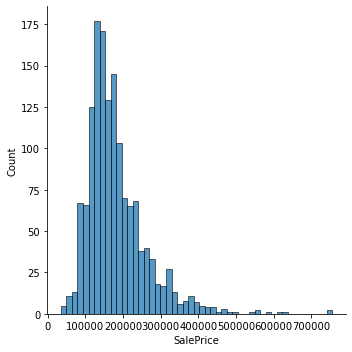

In [35]:
sns.displot(tr["SalePrice"])

SalePrice has high correlation with:
1. OverallQual
2. TotalBsmtSF
3. 1stFirSF
4. GrLivArea
5. FullBath
6. TotRmsAbvGrd
7. GarageCars
8. GarageArea

In [36]:
tr.dropna(axis=1,inplace=True)
tr.columns[tr.isnull().any()]

Index([], dtype='object')

In [37]:
tr.shape

(1460, 63)

In [38]:
ts.dropna(axis=1,inplace=True)

In [39]:
ts.shape

(1459, 47)

In [40]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [41]:
tr.columns[tr.isnull().any()]

Index([], dtype='object')

In [42]:
ts.columns[ts.isnull().any()]

Index([], dtype='object')

In [43]:
tr.shape

(1460, 63)

In [55]:
final_tr=tr[tr.describe().columns]

In [56]:
final_tr.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [57]:
final_tr.shape

(1460, 36)

In [58]:
final_tr.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.902055,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.530822,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.165509,9981.264932,1.382997,1.112799,30.202904,20.645407,180.617287,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
ts

,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition
0,20,11622,Pave,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,...,140,0,0,0,120,0,0,6,2010,Normal
1,20,14267,Pave,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,...,393,36,0,0,0,0,12500,6,2010,Normal
2,60,13830,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,212,34,0,0,0,0,0,3,2010,Normal
3,60,9978,Pave,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,...,360,36,0,0,0,0,0,6,2010,Normal
4,120,5005,Pave,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,...,0,82,0,0,144,0,0,1,2010,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,1936,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,...,0,0,0,0,0,0,0,6,2006,Normal
1455,160,1894,Pave,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,...,0,24,0,0,0,0,0,4,2006,Abnorml
1456,20,20000,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,474,0,0,0,0,0,0,9,2006,Abnorml
1457,85,10441,Pave,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,...,80,32,0,0,0,0,700,7,2006,Normal


In [60]:
final_ts=ts[ts.describe().columns]

In [61]:
final_ts.shape

(1459, 26)

In [62]:
final_tr.shape

(1460, 36)

In [66]:
cols=[]
for i in final_tr.columns:
    if i not in final_ts.columns:
        cols.append(i)
        

In [67]:
cols

['LotFrontage',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'SalePrice']

In [68]:
X=final_tr.drop(columns=cols)
y=final_tr['SalePrice']

In [70]:
X.shape

(1460, 26)

In [71]:
final_ts.shape

(1459, 26)

In [76]:
final_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1459 non-null   float64
 7   1stFlrSF       1459 non-null   int64  
 8   2ndFlrSF       1459 non-null   int64  
 9   LowQualFinSF   1459 non-null   int64  
 10  GrLivArea      1459 non-null   int64  
 11  FullBath       1459 non-null   int64  
 12  HalfBath       1459 non-null   int64  
 13  BedroomAbvGr   1459 non-null   int64  
 14  KitchenAbvGr   1459 non-null   int64  
 15  TotRmsAbvGrd   1459 non-null   int64  
 16  Fireplaces     1459 non-null   int64  
 17  WoodDeckSF     1459 non-null   int64  
 18  OpenPorc

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [87]:
def getErrorMetrics(pred,y):
    print(f"MAE:{mean_absolute_error(pred,y)}\n")
    print(f"MSE:{mean_squared_error(pred,y)}\n")
    print(f"R2 Score:{r2_score(pred,y)}\n")

def makePredictions(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    getErrorMetrics(prediction,y_test)

In [88]:
rf_model=RandomForestRegressor(n_estimators=100)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
makePredictions(rf_model,X_train,y_train,X_test,y_test)

MAE:19024.79710045662

MSE:844942845.9966635

R2 Score:0.8364669863552693



In [91]:
params={
    "n_estimators":[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    "max_features":["auto","sqrt"],
    "max_depth":[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]    
}

rcv=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=params,verbose=2,random_state=42)

In [92]:
rcv.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..max_depth=70, max_features=sqrt, n_estimators=600; total time=   1.0s
[CV] END ..max_depth=70, max_features=sqrt, n_estimators=600; total time=   1.1s
[CV] END ..max_depth=70, max_features=sqrt, n_estimators=600; total time=   1.0s
[CV] END ..max_depth=70, max_features=sqrt, n_estimators=600; total time=   1.0s
[CV] END ..max_depth=70, max_features=sqrt, n_estimators=600; total time=   1.1s
[CV] END .max_depth=80, max_features=auto, n_estimators=1800; total time=   8.2s
[CV] END .max_depth=80, max_features=auto, n_estimators=1800; total time=   8.0s
[CV] END .max_depth=80, max_features=auto, n_estimators=1800; total time=   8.1s
[CV] END .max_depth=80, max_features=auto, n_estimators=1800; total time=   8.1s
[CV] END .max_depth=80, max_features=auto, n_estimators=1800; total time=   8.0s
[CV] END ..max_depth=50, max_features=sqrt, n_estimators=800; total time=   1.4s
[CV] END ..max_depth=50, max_features=sqrt, n_es

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [93]:
rf_best=rcv.best_estimator_

In [94]:
makePredictions(rf_best,X_train,y_train,X_test,y_test)

MAE:18196.160666041527

MSE:847029126.4356802

R2 Score:0.8146976078525515



In [97]:
normal_preds=rf_model.predict(final_ts)

In [98]:
normal_preds

array([124844.5 , 152434.5 , 180299.19, ..., 158025.  , 134787.2 ,
       229850.48])